In [5]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import os
from math import ceil

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, concatenate, LeakyReLU, ReLU, Embedding, Activation

from IPython.display import clear_output, display

import matplotlib.colors as mcolors
import matplotlib
import matplotlib.pyplot as plt

import tensorflow_probability as tfp
tfd = tfp.distributions
tableGAN_path = ".\\tableGAN.ipynb"
image_dir = "Images//"
utils_path = ".//utils.ipynb"

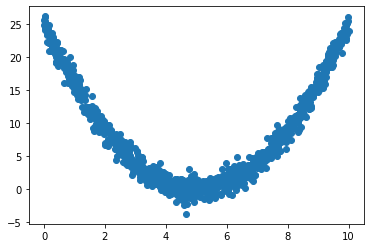

In [6]:
n_train = 1000
x1 = np.random.uniform(0, 10, n_train)
x2 = np.random.normal((x1-5)**2, 1, n_train)
#dummy = np.random.randint(0, 2, size = n_train).astype(str)
dummy = "dummy"
data_toy = pd.DataFrame({"x1" : x1, "x2" : x2, "dummy" : dummy})
plt.scatter(data_toy["x1"], data_toy["x2"])

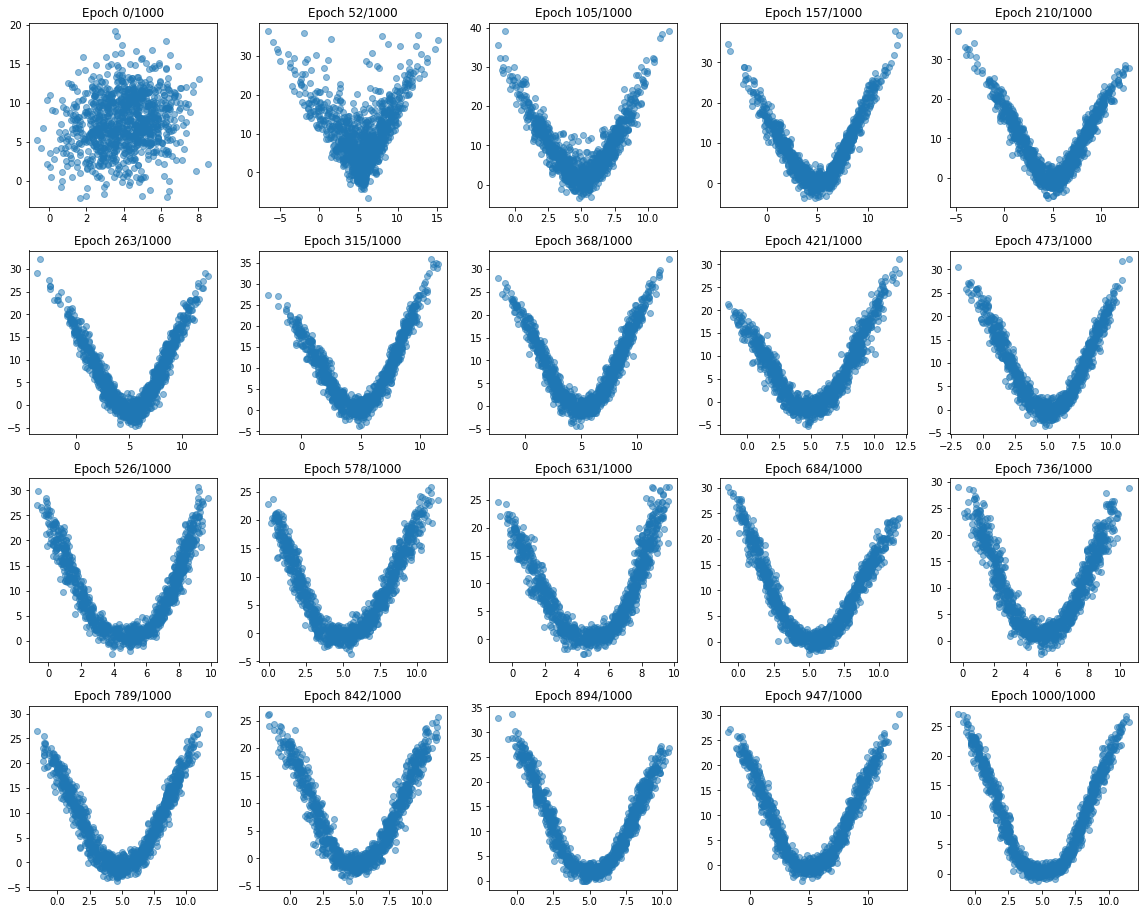

In [8]:
%run "$tableGAN_path"
tgt = TableGAN(data_toy)
fig_l, fig_2D = tgt.train(1000, plot2D_image = True, plot_loss = False, plot_loss_return = True)

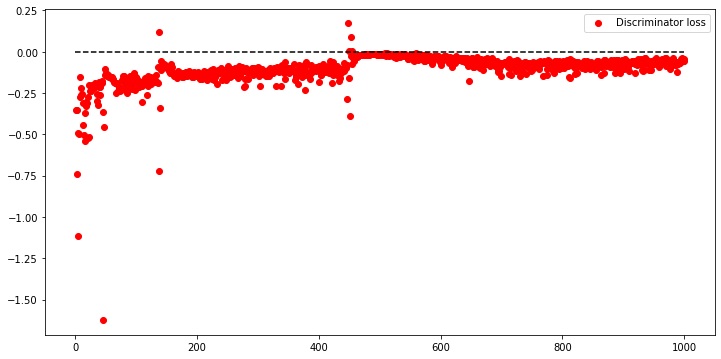

In [9]:
fig_l

In [10]:
tgt.generate_data()

,x1,x2,dummy
0,9.904194,18.931864,dummy
1,8.343863,9.997717,dummy
2,7.729160,4.639312,dummy
3,7.663661,8.941900,dummy
4,4.072011,-0.983365,dummy
...,...,...,...
995,10.192389,20.897400,dummy
996,9.933918,19.794142,dummy
997,7.852861,5.144573,dummy
998,3.986590,1.691075,dummy


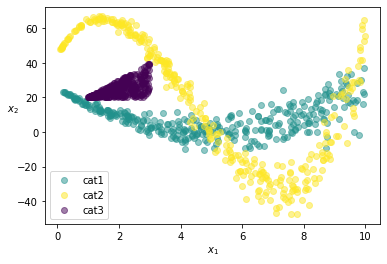

In [109]:
%run "$tableGAN_path"
%run "$utils_path"

n_train = 1000

x1 = np.random.uniform(0, 10, n_train)

labels = np.core.defchararray.add("cat", np.random.randint(1,4, n_train).astype(str))
label_value, counts = np.unique(labels, return_counts =True)
index_end = np.cumsum(counts)
index_start = np.append([0], index_end[:len(index_end)-1])
x1 = np.empty(n_train)
x2 = np.empty(n_train)

for i in range(len(label_value)):
    if label_value[i] in ["cat1", "cat2"]:
        x1_curr = np.random.uniform(0, 10, counts[i])
        x2_curr = np.random.normal(np.where(label_value[i] == "cat1", (x1_curr-5)**2, (x1_curr+1) * (x1_curr-5) * (x1_curr-9)),
                      x1_curr, counts[i])
    elif label_value[i] == "cat3":
        x1_curr = np.random.uniform(1,3, counts[i])
        x2_curr = np.random.uniform(20, (x1_curr - 1) * 10 + 20, counts[i])
    else:
        print("Something wrong")
        
    x1[index_start[i]:index_end[i]] = x1_curr
    x2[index_start[i]:index_end[i]] = x2_curr
    labels[index_start[i]:index_end[i]] = label_value[i]

fig, ax = plt.subplots(1)
plt.set_cmap("viridis")
data_toy2 = pd.DataFrame({"x1" : x1, "x2" : x2, "labels" : labels.astype(str)})
labels_unique = np.unique(data_toy2["labels"])
colors = map_str_to_color(labels_unique)
for i, lab in enumerate(labels_unique):
    data_toy2_subset = data_toy2.loc[data_toy2["labels"] == lab]
    plt.scatter(data_toy2_subset["x1"], data_toy2_subset["x2"], color = colors[i], alpha=0.5,
           label = lab)
plt.legend()
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$", rotation = 0)
plt.savefig(os.path.join(image_dir, "syn2D_3cats.jpg"))

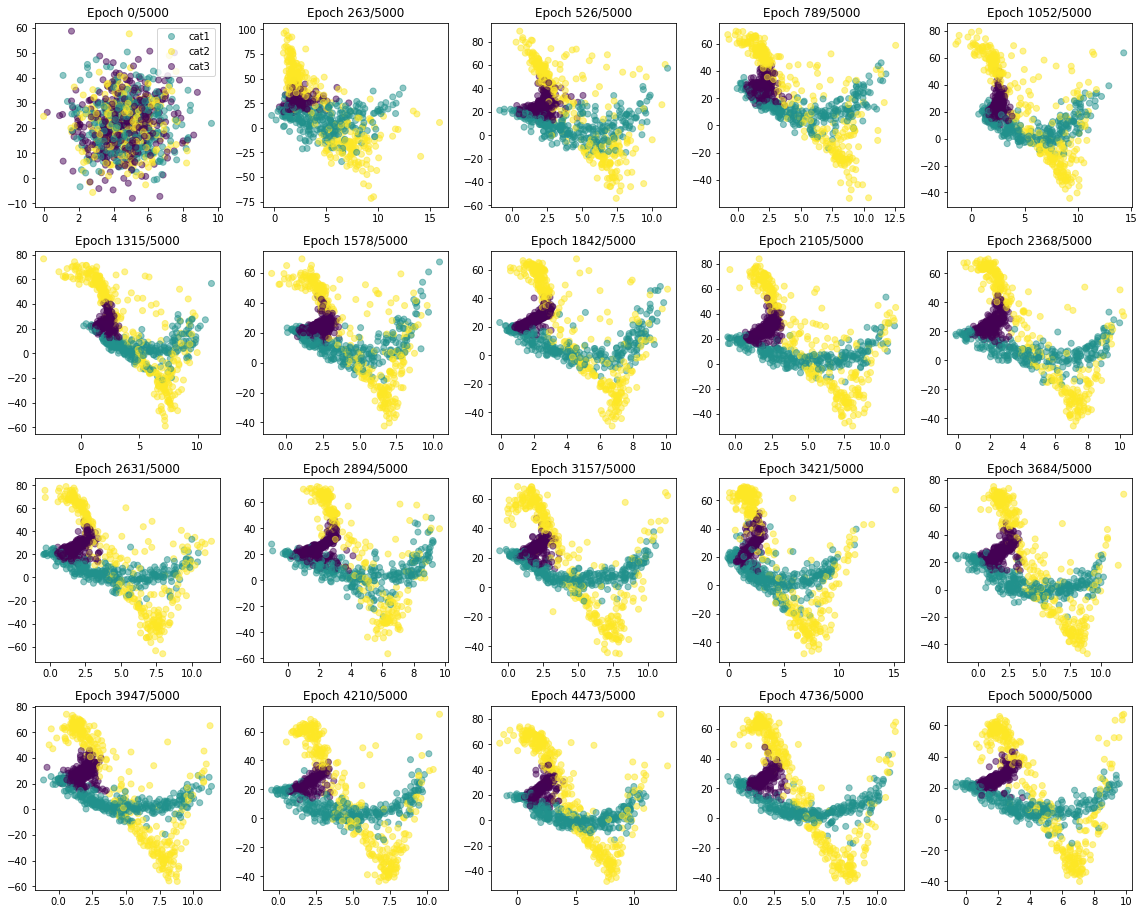

In [103]:
%run "$tableGAN_path"
tgt2 = TableGAN(data_toy2, n_critic = 5, quantile_transformation_int = False)
fig2_l, fig2_2D = tgt2.train(5000, 500, plot2D_image = True, plot2D_discrete_col = "labels",
                            save_dir = image_dir, filename_plot2D = "syn2D_3cats_plot2D.jpg",
                            filename_train_loss = "syn2D_3cats_train_loss.jpg", 
                            loss_plot_type = "line", plot_loss = False, plot_loss_return = True)

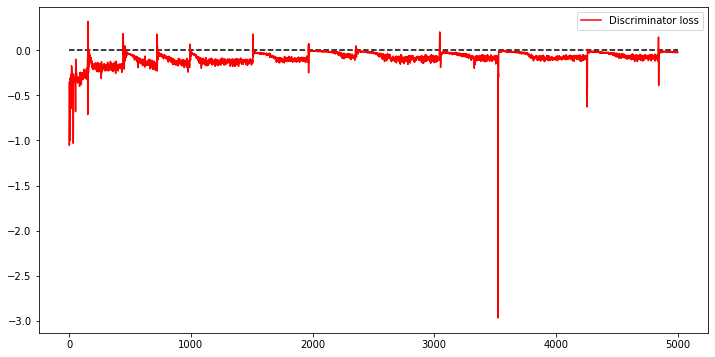

In [16]:
fig2_l

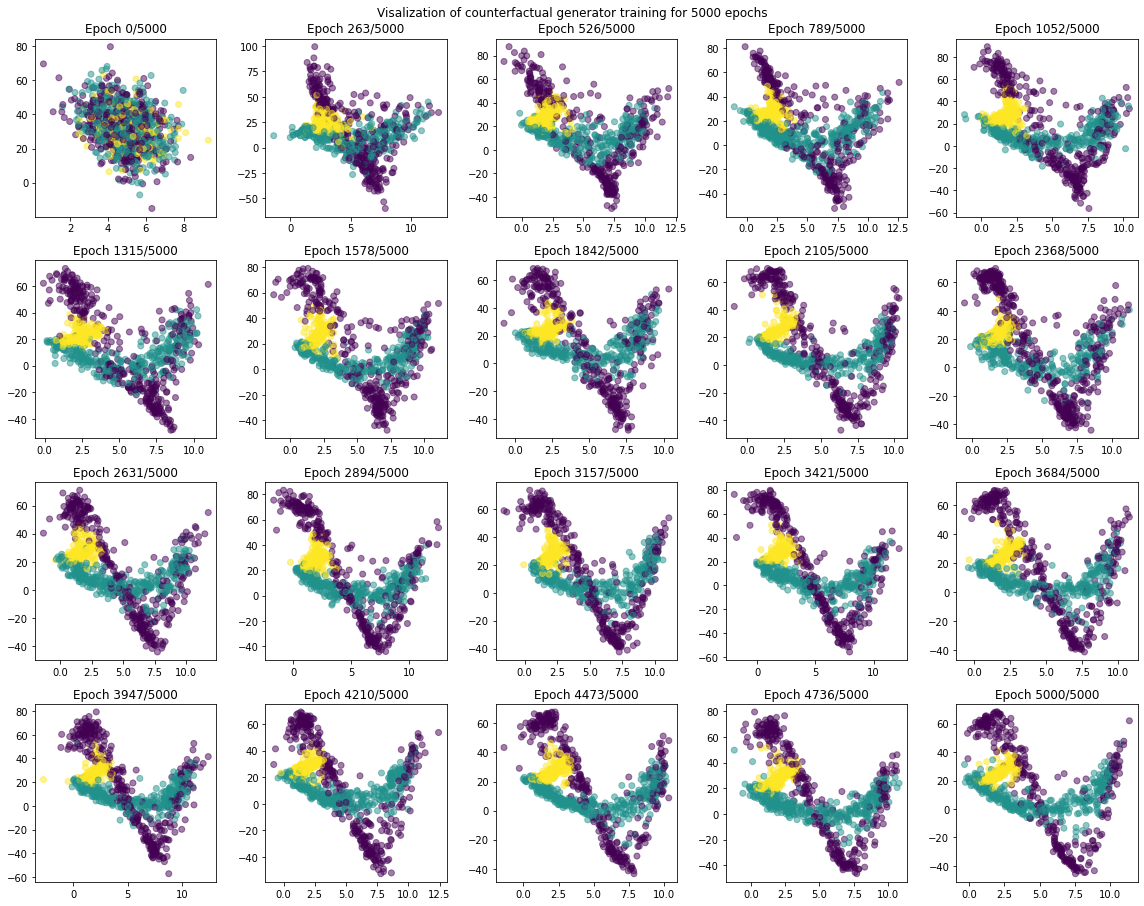

In [17]:
fig2_2D